# Image Extraction from Video

In [6]:
import cv2
import supervision as sv
from tqdm import tqdm

In [4]:
VIDEO_DIR_PATH = f"videos"
IMAGE_DIR_PATH = f"images (pre-annotation)"
FRAME_STRIDE = 1000

video_paths = sv.list_files_with_extensions(directory=VIDEO_DIR_PATH, extensions=["webm"])
image_paths = sv.list_files_with_extensions(directory=IMAGE_DIR_PATH,extensions=["png"])

In [8]:
TRAIN_VIDEO_PATHS, TEST_VIDEO_PATHS = video_paths[:3], video_paths[3:]

# print(video_paths)
# print(TRAIN_VIDEO_PATHS)
# print(TEST_VIDEO_PATHS)

for video_path in tqdm(TRAIN_VIDEO_PATHS):
    video_name = video_path.stem
    image_name_pattern = video_name + "-{:05d}.png"
    with sv.ImageSink(target_dir_path=IMAGE_DIR_PATH, image_name_pattern=image_name_pattern) as sink:
        for image in sv.get_video_frames_generator(source_path=str(video_path), stride=FRAME_STRIDE):
            sink.save_image(image=image)

100%|██████████| 1/1 [01:52<00:00, 112.29s/it]


In [5]:
print('image count:', len(image_paths))

image count: 150


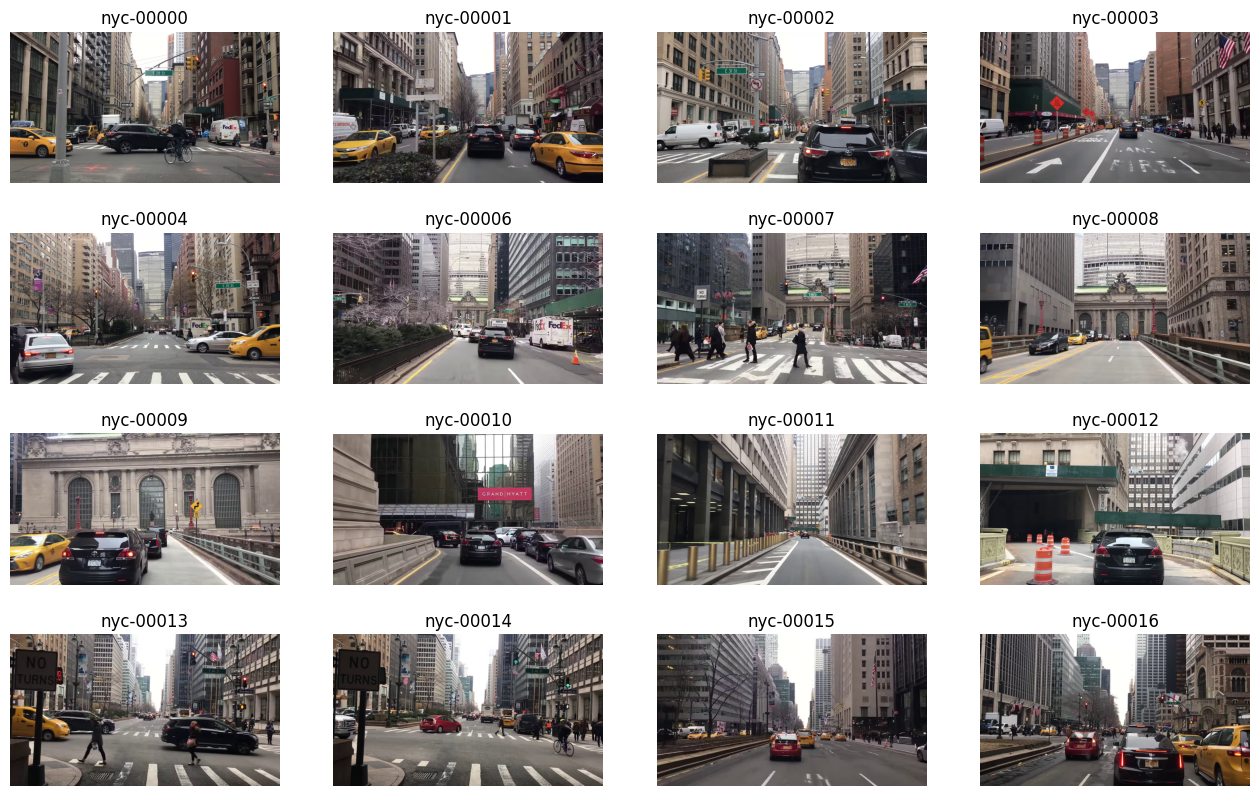

In [ ]:
#Displaying the images

SAMPLE_SIZE = 16
SAMPLE_GRID_SIZE = (4, 4)
SAMPLE_PLOT_SIZE = (16, 10)


titles = [image_path.stem for image_path in image_paths[:SAMPLE_SIZE]]
images = [ cv2.imread(str(image_path)) for image_path in image_paths[:SAMPLE_SIZE]]

sv.plot_images_grid(images=images, titles=titles, grid_size=SAMPLE_GRID_SIZE, size=SAMPLE_PLOT_SIZE)